# Introduction to Dataset
<p> The dataset contains information about the performance of Starcraft players in ranked games. It includes various features that capture the players' actions during gameplay. The goal is to predict the rank of a player based on specific parameters. The dataset provides insights into the players' actions per minute (APM), which is a crucial factor in predicting their performance.By considering factors such as APM, ActionLatency, GapBetweenPACs, and other relevant features, we can train a model to accurately predict and determine a player's rank.</p>

In [23]:
## Import the important libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler



In [24]:
## Load Dataset
data = pd.read_csv(r'starcraft_player_data.csv')
data.head()

,GameID,LeagueIndex,Age,HoursPerWeek,TotalHours,APM,SelectByHotkeys,AssignToHotkeys,UniqueHotkeys,MinimapAttacks,MinimapRightClicks,NumberOfPACs,GapBetweenPACs,ActionLatency,ActionsInPAC,TotalMapExplored,WorkersMade,UniqueUnitsMade,ComplexUnitsMade,ComplexAbilitiesUsed
0,52,5,27,10,3000,143.7180,0.003515,0.000220,7,0.000110,0.000392,0.004849,32.6677,40.8673,4.7508,28,0.001397,6,0.0,0.000000
1,55,5,23,10,5000,129.2322,0.003304,0.000259,4,0.000294,0.000432,0.004307,32.9194,42.3454,4.8434,22,0.001193,5,0.0,0.000208
2,56,4,30,10,200,69.9612,0.001101,0.000336,4,0.000294,0.000461,0.002926,44.6475,75.3548,4.0430,22,0.000745,6,0.0,0.000189
3,57,3,19,20,400,107.6016,0.001034,0.000213,1,0.000053,0.000543,0.003783,29.2203,53.7352,4.9155,19,0.000426,7,0.0,0.000384
4,58,3,32,10,500,122.8908,0.001136,0.000327,2,0.000000,0.001329,0.002368,22.6885,62.0813,9.3740,15,0.001174,4,0.0,0.000019


### Exploratory Data Analysis (EDA)

In [25]:
data.describe()

,GameID,LeagueIndex,APM,SelectByHotkeys,AssignToHotkeys,UniqueHotkeys,MinimapAttacks,MinimapRightClicks,NumberOfPACs,GapBetweenPACs,ActionLatency,ActionsInPAC,TotalMapExplored,WorkersMade,UniqueUnitsMade,ComplexUnitsMade,ComplexAbilitiesUsed
count,3395.000000,3395.000000,3395.000000,3395.000000,3395.000000,3395.000000,3395.000000,3395.000000,3395.000000,3395.000000,3395.000000,3395.000000,3395.000000,3395.000000,3395.000000,3395.000000,3395.000000
mean,4805.012371,4.184094,117.046947,0.004299,0.000374,4.364654,0.000098,0.000387,0.003463,40.361562,63.739403,5.272988,22.131664,0.001032,6.534021,0.000059,0.000142
std,2719.944851,1.517327,51.945291,0.005284,0.000225,2.360333,0.000166,0.000377,0.000992,17.153570,19.238869,1.494835,7.431719,0.000519,1.857697,0.000111,0.000265
min,52.000000,1.000000,22.059600,0.000000,0.000000,0.000000,0.000000,0.000000,0.000679,6.666700,24.093600,2.038900,5.000000,0.000077,2.000000,0.000000,0.000000
25%,2464.500000,3.000000,79.900200,0.001258,0.000204,3.000000,0.000000,0.000140,0.002754,28.957750,50.446600,4.272850,17.000000,0.000683,5.000000,0.000000,0.000000
50%,4874.000000,4.000000,108.010200,0.002500,0.000353,4.000000,0.000040,0.000281,0.003395,36.723500,60.931800,5.095500,22.000000,0.000905,6.000000,0.000000,0.000020
75%,7108.500000,5.000000,142.790400,0.005133,0.000499,6.000000,0.000119,0.000514,0.004027,48.290500,73.681300,6.033600,27.000000,0.001259,8.000000,0.000086,0.000181
max,10095.000000,8.000000,389.831400,0.043088,0.001752,10.000000,0.003019,0.004041,0.007971,237.142900,176.372100,18.558100,58.000000,0.005149,13.000000,0.000902,0.003084


In [26]:
## Checking if there are any null values
data.isnull().sum() 

GameID                  0
LeagueIndex             0
Age                     0
HoursPerWeek            0
TotalHours              0
APM                     0
SelectByHotkeys         0
AssignToHotkeys         0
UniqueHotkeys           0
MinimapAttacks          0
MinimapRightClicks      0
NumberOfPACs            0
GapBetweenPACs          0
ActionLatency           0
ActionsInPAC            0
TotalMapExplored        0
WorkersMade             0
UniqueUnitsMade         0
ComplexUnitsMade        0
ComplexAbilitiesUsed    0
dtype: int64

In [27]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3395 entries, 0 to 3394
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   GameID                3395 non-null   int64  
 1   LeagueIndex           3395 non-null   int64  
 2   Age                   3395 non-null   object 
 3   HoursPerWeek          3395 non-null   object 
 4   TotalHours            3395 non-null   object 
 5   APM                   3395 non-null   float64
 6   SelectByHotkeys       3395 non-null   float64
 7   AssignToHotkeys       3395 non-null   float64
 8   UniqueHotkeys         3395 non-null   int64  
 9   MinimapAttacks        3395 non-null   float64
 10  MinimapRightClicks    3395 non-null   float64
 11  NumberOfPACs          3395 non-null   float64
 12  GapBetweenPACs        3395 non-null   float64
 13  ActionLatency         3395 non-null   float64
 14  ActionsInPAC          3395 non-null   float64
 15  TotalMapExplored     

<h2>Missing Values</h2>
<p>Although the dataset has missing values, we can observe that these missing values are specifically associated with players in the 8th LeagueIndex. Instead of removing these instances, we can replace the missing values with suitable alternatives. By doing so, we can improve the model's ability to predict the rank for players in the 8th league. This approach allows us to retain valuable data and enhance the accuracy of our predictions.</p>

In [28]:
# We do have missing or unkown value
data.tail() 

,GameID,LeagueIndex,Age,HoursPerWeek,TotalHours,APM,SelectByHotkeys,AssignToHotkeys,UniqueHotkeys,MinimapAttacks,MinimapRightClicks,NumberOfPACs,GapBetweenPACs,ActionLatency,ActionsInPAC,TotalMapExplored,WorkersMade,UniqueUnitsMade,ComplexUnitsMade,ComplexAbilitiesUsed
3390,10089,8,?,?,?,259.6296,0.020425,0.000743,9,0.000621,0.000146,0.004555,18.6059,42.8342,6.2754,46,0.000877,5,0.000000,0.000000
3391,10090,8,?,?,?,314.6700,0.028043,0.001157,10,0.000246,0.001083,0.004259,14.3023,36.1156,7.1965,16,0.000788,4,0.000000,0.000000
3392,10092,8,?,?,?,299.4282,0.028341,0.000860,7,0.000338,0.000169,0.004439,12.4028,39.5156,6.3979,19,0.001260,4,0.000000,0.000000
3393,10094,8,?,?,?,375.8664,0.036436,0.000594,5,0.000204,0.000780,0.004346,11.6910,34.8547,7.9615,15,0.000613,6,0.000000,0.000631
3394,10095,8,?,?,?,348.3576,0.029855,0.000811,4,0.000224,0.001315,0.005566,20.0537,33.5142,6.3719,27,0.001566,7,0.000457,0.000895


<h3> Data Preprocessing </h3>
<p> After conducting a thorough analysis, it was observed that younger individuals, particularly teenagers, tend to have higher ranks. Additionally, players with higher values of 'TotalHours' and 'HoursPerWeek' are typically considered skilled players. Based on these findings, a decision was made to fill in the missing values in the dataset.

For the missing 'Age' values, the median age was chosen as a representative value, assuming that the missing values are likely to be similar to the median age of the available data. This approach takes into account the trend of younger individuals having higher ranks.

Regarding the missing values in 'TotalHours' and 'HoursPerWeek', the maximum values in the respective columns were assigned. This is because players with a rank of 8 are considered professionals, and it is reasonable to assume that they have spent a significant amount of time playing the game.

</p>

In [29]:
# Convert the columns to numeric (if they are not already)
data['Age'] = pd.to_numeric(data['Age'], errors='coerce')
data['TotalHours'] = pd.to_numeric(data['TotalHours'], errors='coerce')
data['HoursPerWeek'] = pd.to_numeric(data['HoursPerWeek'], errors='coerce')

# Inpute missing values with median and max for total_hours and hours_per_week
median_age = data['Age'].median()
max_total_hours = data['TotalHours'].max()
max_hours_per_week = data['HoursPerWeek'].max()

data['Age'].fillna(median_age, inplace=True)
data['TotalHours'].fillna(max_total_hours, inplace=True)
data['HoursPerWeek'].fillna(max_hours_per_week, inplace=True)
data=data.dropna()  ## If there are any null values (As we know we dont have it but still to be safe)
data.tail()

,GameID,LeagueIndex,Age,HoursPerWeek,TotalHours,APM,SelectByHotkeys,AssignToHotkeys,UniqueHotkeys,MinimapAttacks,MinimapRightClicks,NumberOfPACs,GapBetweenPACs,ActionLatency,ActionsInPAC,TotalMapExplored,WorkersMade,UniqueUnitsMade,ComplexUnitsMade,ComplexAbilitiesUsed
3390,10089,8,21.0,168.0,1000000.0,259.6296,0.020425,0.000743,9,0.000621,0.000146,0.004555,18.6059,42.8342,6.2754,46,0.000877,5,0.000000,0.000000
3391,10090,8,21.0,168.0,1000000.0,314.6700,0.028043,0.001157,10,0.000246,0.001083,0.004259,14.3023,36.1156,7.1965,16,0.000788,4,0.000000,0.000000
3392,10092,8,21.0,168.0,1000000.0,299.4282,0.028341,0.000860,7,0.000338,0.000169,0.004439,12.4028,39.5156,6.3979,19,0.001260,4,0.000000,0.000000
3393,10094,8,21.0,168.0,1000000.0,375.8664,0.036436,0.000594,5,0.000204,0.000780,0.004346,11.6910,34.8547,7.9615,15,0.000613,6,0.000000,0.000631
3394,10095,8,21.0,168.0,1000000.0,348.3576,0.029855,0.000811,4,0.000224,0.001315,0.005566,20.0537,33.5142,6.3719,27,0.001566,7,0.000457,0.000895


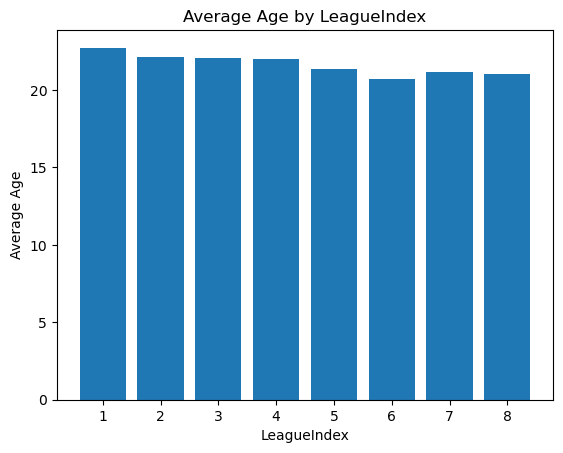

In [30]:
# Data showing mean age for each rank
age_by_rank = data.groupby('LeagueIndex')['Age'].mean()

# Bar graph
plt.bar(age_by_rank.index, age_by_rank.values)
plt.xlabel('LeagueIndex')
plt.ylabel('Average Age')
plt.title('Average Age by LeagueIndex')
plt.show()


<p>The bar graph reveals that players within the age group of 15 to 25 tend to have higher levels of gameplay activity. Additionally, the distribution of age groups 1 to 4 appears larger in comparison to age groups 5 to 8, indicating that as the rank increases, the player population tends to skew slightly younger.</p>

### Additional Features

In [31]:
# We have columns with relationship
data['hours_played_per_day'] = data['HoursPerWeek'] / 7


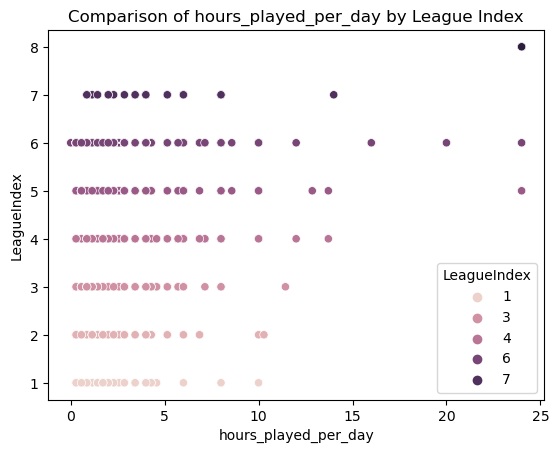

In [32]:
# Data visualization
sns.scatterplot(x='hours_played_per_day', y='LeagueIndex', hue='LeagueIndex', data=data)
plt.xlabel('hours_played_per_day')
plt.ylabel('LeagueIndex')
plt.title('Comparison of hours_played_per_day by League Index')
plt.show()


<p>This figure illustrates that there is an increasing trend in hours_played_per_day as the LeagueIndex increases from 5 to higher ranks. However, it is important to note that the data may still be too similar or have limited variability to effectively train a model. To achieve better performance and accuracy, additional powerful features or a more diverse range of data may be needed.</p>

<h2><i>Custom Equation</i></h2>
<p> Considering the complexity of the data, it was challenging to train the model effectively. However, based on my analysis, I have noticed that the usage of HotKeys during gameplay is a crucial feature. Even though some players may be aware of new hotkeys, they may not utilize them effectively due to the difficulty of remembering them in the heat of the game. Therefore, incorporating HotKeys as a significant feature can greatly enhance the model's training and prediction accuracy.</p> 

In [47]:
data['HotKeysUsage'] = (data['SelectByHotkeys'] + data['AssignToHotkeys'] + data['UniqueHotkeys']) * data['LeagueIndex']


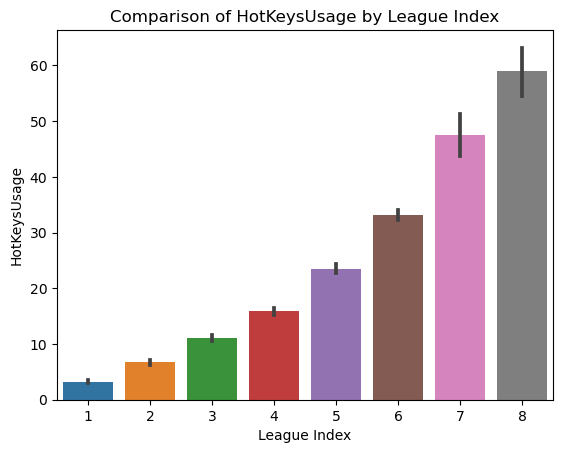

In [48]:
sns.barplot(x='LeagueIndex', y='HotKeysUsage', data=data)
plt.xlabel('League Index')
plt.ylabel('HotKeysUsage')
plt.title('Comparison of HotKeysUsage by League Index')
plt.show()


<p>The data reveals a clear linear trend, indicating that there is a consistent increase in HotKey usage as the rank of the players progresses. This observation provides valuable and accurate information that can be utilized in training the model for rank prediction. By incorporating this feature, the model will be able to capture the relationship between HotKey usage and player rank, resulting in more accurate predictions.</p><hr>
<p>A player's rank is positively correlated with their speed and accuracy in performing actions. A lower combined value of the features "NumberOfPACs," "GapBetweenPACs," "ActionLatency," and "ActionsInPAC" indicates a higher level of speed and precision, leading to a higher rank.</p>

In [49]:
# Performace of player to see their speed and accuracy
data['Performance'] = data['NumberOfPACs'] * data['GapBetweenPACs'] * data['ActionLatency'] * data['ActionsInPAC']

In [50]:
# MapData feature to maximize the accuracy
data['MapData'] = data['MinimapAttacks'] + data['MinimapRightClicks'] + data['TotalMapExplored']
data.head()

,GameID,LeagueIndex,Age,HoursPerWeek,TotalHours,APM,SelectByHotkeys,AssignToHotkeys,UniqueHotkeys,MinimapAttacks,...,ActionsInPAC,TotalMapExplored,WorkersMade,UniqueUnitsMade,ComplexUnitsMade,ComplexAbilitiesUsed,hours_played_per_day,HotKeysUsage,Performance,MapData
0,52,5,27.0,10.0,3000.0,143.7180,0.003515,0.000220,7,0.000110,...,4.7508,28,0.001397,6,0.0,0.000000,1.428571,35.018674,30.755069,28.000502
1,55,5,23.0,10.0,5000.0,129.2322,0.003304,0.000259,4,0.000294,...,4.8434,22,0.001193,5,0.0,0.000208,1.428571,20.017816,29.079695,22.000726
2,56,4,30.0,10.0,200.0,69.9612,0.001101,0.000336,4,0.000294,...,4.0430,22,0.000745,6,0.0,0.000189,1.428571,16.005747,39.796948,22.000755
3,57,3,19.0,20.0,400.0,107.6016,0.001034,0.000213,1,0.000053,...,4.9155,19,0.000426,7,0.0,0.000384,2.857143,3.003740,29.194166,19.000597
4,58,3,32.0,10.0,500.0,122.8908,0.001136,0.000327,2,0.000000,...,9.3740,15,0.001174,4,0.0,0.000019,1.428571,6.004390,31.270019,15.001329


<h2> Selecting Important Features </h2>
<p>The dependent variable in the model does not include the GameID as it is not relevant for predicting the rank. The variable "LeagueIndex" is used as the target variable (y) to predict the player's rank.</p>

In [51]:
x = data.drop(['LeagueIndex', 'GameID','ComplexUnitsMade','ComplexAbilitiesUsed'], axis=1)

y = data['LeagueIndex']

# Split the data into training and testing sets
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=48)

# Perform feature scaling on the numerical features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(xtrain)
X_test_scaled = scaler.transform(xtest)


<h2> Logistic Model </h2>
<p> After extensive testing with various features and models, the logistic regression model has been selected as the final choice. The decision was based on the fact that the target variable, "LeagueIndex," is ordinal in nature, making the logistic regression model the most suitable for predicting the player's rank. </p>

In [52]:
# Train a logistic regression model
model = LogisticRegression()
model = LogisticRegression(max_iter=1000)

model.fit(X_train_scaled, ytrain)
y_pred = model.predict(X_test_scaled)
print("Accuracy Score:", accuracy_score(ytest, y_pred)*100)

print("Confusion Matrix:")
print(confusion_matrix(ytest, y_pred))
print("Classification Report:")
print(classification_report(ytest, y_pred))


Accuracy Score: 84.38880706921944
Confusion Matrix:
[[ 15  11   1   0   0   0   0   0]
 [  8  44  17   1   0   0   0   0]
 [  1   5  90  11   0   0   0   0]
 [  0   1   5 143   7   0   0   0]
 [  0   0   1  21 139   1   0   1]
 [  0   0   0   1   6 132   2   0]
 [  0   0   0   0   0   5   1   0]
 [  0   0   0   0   0   0   0   9]]
Classification Report:
              precision    recall  f1-score   support

           1       0.62      0.56      0.59        27
           2       0.72      0.63      0.67        70
           3       0.79      0.84      0.81       107
           4       0.81      0.92      0.86       156
           5       0.91      0.85      0.88       163
           6       0.96      0.94      0.95       141
           7       0.33      0.17      0.22         6
           8       0.90      1.00      0.95         9

    accuracy                           0.84       679
   macro avg       0.76      0.74      0.74       679
weighted avg       0.84      0.84      0.84     

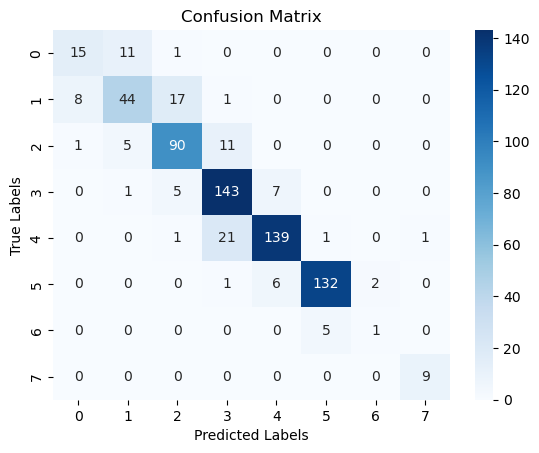

In [53]:
# Plotting Confusion Matrix
confusion_mat = confusion_matrix(ytest, y_pred)

sns.heatmap(confusion_mat, annot=True, cmap="Blues", fmt="d")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()


In [40]:
league_counts = data['LeagueIndex'].value_counts()
print(league_counts)


4    811
5    806
6    621
3    553
2    347
1    167
8     55
7     35
Name: LeagueIndex, dtype: int64


<p><ol><b>Based on the EDA and model results, here are some recommendations to guide stakeholders in collecting more data:</b><hr>
<li>Collect additional features related to Players Laptop: Since the current dataset does not include information about players' laptops, gathering data on laptop specifications, performance, or other relevant attributes could potentially provide valuable insights. These features may influence players' performance and could contribute to improving the accuracy of the model.</li>

<li>Focus on collecting more data for higher-ranked players (LeagueIndex 7 and 8): As observed in the dataset, there is a relatively smaller number of data points for players in the higher ranks (LeagueIndex 7 and 8). Gathering more data specifically for these ranks can help to balance the dataset and improve the model's accuracy for predicting higher ranks.</li>

<li>Maintain data quality and consistency: Emphasize the importance of collecting high-quality and consistent data. Ensure that the data collection process follows proper protocols and guidelines to minimize errors and maintain the integrity of the dataset.</li></ol>


Overall, the advice is to collect additional features related to players' laptops, focus on gathering more data for higher-ranked players, consider capturing additional contextual information, maintain data quality, and regularly evaluate and update the model.
</p>




